In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from os.path import expanduser

In [2]:
# Read in the complete loan data set into a DataFrame
home = expanduser('~')
data_dir = home + '/Dropbox/Personal/Jupyter/Notebooks/DataScience-SMU/MSDS7331-Data-Mining/Homework/data/'
filename = 'loan.csv'
df_all = pd.read_csv(data_dir + filename, low_memory=False)

In [3]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
id                             887379 non-null int64
member_id                      887379 non-null int64
loan_amnt                      887379 non-null float64
funded_amnt                    887379 non-null float64
funded_amnt_inv                887379 non-null float64
term                           887379 non-null object
int_rate                       887379 non-null float64
installment                    887379 non-null float64
grade                          887379 non-null object
sub_grade                      887379 non-null object
emp_title                      835922 non-null object
emp_length                     887379 non-null object
home_ownership                 887379 non-null object
annual_inc                     887375 non-null float64
verification_status            887379 non-null object
issue_d                        887379 non-null object
loan_status          

In [4]:
# Drop the attributes that we think are not applicable to this model or have an insignificant amount of data. This is continuation from Lab 1.
df_all.drop(['id',
             'member_id',
             'verification_status',
             'issue_d',
             'pymnt_plan',
             'url',
             'desc',
             'title',
             'earliest_cr_line',
             'emp_title',
             'inq_last_6mths',
             'initial_list_status',
             'out_prncp',
             'out_prncp_inv',
             'last_pymnt_d',
             'last_pymnt_amnt',
             'next_pymnt_d',
             'last_credit_pull_d',
             'collections_12_mths_ex_med',
             'mths_since_last_delinq',
             'mths_since_last_record',
             'mths_since_last_major_derog',
             'policy_code',
             'application_type',
             'annual_inc_joint',
             'annual_inc_joint',
             'dti_joint',
             'verification_status_joint',
             'acc_now_delinq',
             'tot_coll_amt',
             'tot_cur_bal',
             'open_acc_6m',
             'open_il_6m',
             'open_il_12m',
             'open_il_24m',
             'mths_since_rcnt_il',
             'total_bal_il',
             'il_util',
             'open_rv_12m',
             'open_rv_24m',
             'max_bal_bc',
             'all_util',
             'total_rev_hi_lim',
             'inq_fi',
             'total_cu_tl',
             'inq_last_12m',
             'purpose',
             'zip_code',
             'addr_state',
             'revol_util',
             'revol_bal',
             'pub_rec',
             'total_acc',
             'dti',
             'delinq_2yrs',
             'annual_inc',
             'open_acc'], axis =1, inplace=True)

In [5]:
df_all = df_all.dropna()

In [6]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 0 to 887378
Data columns (total 18 columns):
loan_amnt                  887379 non-null float64
funded_amnt                887379 non-null float64
funded_amnt_inv            887379 non-null float64
term                       887379 non-null object
int_rate                   887379 non-null float64
installment                887379 non-null float64
grade                      887379 non-null object
sub_grade                  887379 non-null object
emp_length                 887379 non-null object
home_ownership             887379 non-null object
loan_status                887379 non-null object
total_pymnt                887379 non-null float64
total_pymnt_inv            887379 non-null float64
total_rec_prncp            887379 non-null float64
total_rec_int              887379 non-null float64
total_rec_late_fee         887379 non-null float64
recoveries                 887379 non-null float64
collection_recovery_fee    8

In [7]:
# Encode loan term (36 or 60 months) to be a binary value
df_all['IsShortTerm'] = df_all.term.str.contains('36')
df_all.IsShortTerm = df_all.IsShortTerm.astype(np.int)
del df_all['term']

In [8]:
df_all.IsShortTerm.value_counts()

1    621125
0    266254
Name: IsShortTerm, dtype: int64

In [9]:
# Hot encode loan grade (A, B, C, D, E, F, G)
tmp_df = pd.get_dummies(df_all.grade,prefix='grade')
df_all = pd.concat((df_all,tmp_df),axis=1)

In [10]:
if 'grade' in df_all:    
    del df_all['grade']
    del df_all['sub_grade']

In [11]:
# Hot encode employment length
tmp_df = pd.get_dummies(df_all.emp_length,prefix='emp_length')
df_all = pd.concat((df_all,tmp_df),axis=1)

In [12]:
if 'emp_length' in df_all:    
    del df_all['emp_length']

In [13]:
# Hot encode home ownership
tmp_df = pd.get_dummies(df_all.home_ownership,prefix='home_ownership')
df_all = pd.concat((df_all,tmp_df),axis=1)

In [14]:
if 'home_ownership' in df_all:    
    del df_all['home_ownership']

In [15]:
df_all = df_all.replace(to_replace= ['Fully Paid',
                                     'Current',
                                     'Does not meet the credit policy. Status:Fully Paid'], value = 1)
df_all = df_all.replace(to_replace= ['Charged Off',
                                     'Issued',
                                     'Late (31-120 days)',
                                     'In Grace Period',
                                     'Late (16-30 days)',
                                     'Default',
                                     'Does not meet the credit policy. Status:Charged Off'], value = 0)

In [16]:
df_all = df_all.rename(columns={'loan_status':'IsLoanStatusGood'})

In [17]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887379 entries, 0 to 887378
Data columns (total 39 columns):
loan_amnt                  887379 non-null float64
funded_amnt                887379 non-null float64
funded_amnt_inv            887379 non-null float64
int_rate                   887379 non-null float64
installment                887379 non-null float64
IsLoanStatusGood           887379 non-null int64
total_pymnt                887379 non-null float64
total_pymnt_inv            887379 non-null float64
total_rec_prncp            887379 non-null float64
total_rec_int              887379 non-null float64
total_rec_late_fee         887379 non-null float64
recoveries                 887379 non-null float64
collection_recovery_fee    887379 non-null float64
IsShortTerm                887379 non-null int64
grade_A                    887379 non-null float64
grade_B                    887379 non-null float64
grade_C                    887379 non-null float64
grade_D                   

### Create logistic regression model and support vector machine model

In [18]:
if 'IsLoanStatusGood' in df_all:
    y = df_all['IsLoanStatusGood'].values
    del df_all['IsLoanStatusGood']
    X = df_all.values

In [19]:
print y.shape
print X.shape

(887379,)
(887379, 38)


##### Logistic Regression Model

In [ ]:
t1 = time.clock()

from sklearn.cross_validation import ShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

num_cv_iterations = 3
num_instances = len(y)
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         train_size = 0.8,
                         test_size = 0.2)
                         
print cv_object

lr_clf = LogisticRegression(penalty='l2', C=1.0, class_weight=None)

iter_num=0
for train_indices, test_indices in cv_object: 
    X_train = X[train_indices]
    y_train = y[train_indices]
    
    X_test = X[test_indices]
    y_test = y[test_indices]
    
    # train the reusable logisitc regression model on the training data
    t2 = time.clock()
    lr_clf.fit(X_train,y_train)
    t3 = time.clock()
    print('Training time for Logistic Regression Model: %.3f seconds' % (t3-t2))
    y_hat = lr_clf.predict(X_test) # get test set precitions

    # now let's get the accuracy and confusion matrix for this iterations of training/testing
    acc = mt.accuracy_score(y_test,y_hat)
    conf = mt.confusion_matrix(y_test,y_hat)
    print "====Iteration",iter_num," ===="
    print "accuracy", acc 
    print "confusion matrix\n",conf
    iter_num+=1

t4 = time.clock()
print('Logistic Regression Model ran in: %.3f seconds' % (t4-t1))

ShuffleSplit(887379, n_iter=3, test_size=0.2, random_state=None)
Training time for Logistic Regression Model: 9.693 seconds
====Iteration

We varied the Cost from 0.01 to 10000, in factors of 10, and the accuracy remained around 94%, holding the class weight at None. The training and testing time did not vary significantly.

We varied the Cost from 0.01 to 10000, in factors of 10, and the accuracy remained around 80%, holding the class weight at Balanced. The training and testing time did not vary significantly.

##### Support Vector Classification

In [22]:
# take a timestamp at the beginning of the SVM process
t1 = time.clock()

from sklearn.cross_validation import ShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

num_cv_iterations = 3
num_instances = len(y)

# due to unreasonable time constraint, we had to limit the training and test data to 1/10
# http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# C-Support Vector Classification.
# The implementation is based on libsvm.
# The fit time complexity is more than quadratic with the number of samples
# which makes it hard to scale to dataset with more than a couple of 10000 samples.
cv_object = ShuffleSplit(n=num_instances,
                         n_iter=num_cv_iterations,
                         train_size = 0.01,
                         test_size = 0.1)
                         
print cv_object

for train_indices, test_indices in cv_object: 
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]

scl_obj = StandardScaler()
scl_obj.fit(X_train)
X_train_scaled = scl_obj.transform(X_train) # apply to training
X_test_scaled = scl_obj.transform(X_test)

# train the model
svm_clf = SVC(C=1.0, kernel='linear', degree=3, gamma='auto', verbose=2) # get object
svm_clf.fit(X_train_scaled, y_train)

# get the test set predictions
y_hat = svm_clf.predict(X_test_scaled)

acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print 'Accuracy:', acc 
print conf

t2 = time.clock()
print('SVM ran in: %.3f seconds' % (t2-t1))

ShuffleSplit(887379, n_iter=3, test_size=0.1, random_state=None)
[LibSVM]Accuracy: 0.940386305754
[[ 2336  5290]
 [    0 81112]]
SVM ran in: 27.489 seconds


Adjusting the Cost to 1.0 resulted in the most accurate model at 94.1%. However, this was not significantly better than varying the Cost between 0.01 and 10. The time utilized for training and fitting the data increased substantially as we increased the Cost factor from 0.01 to 10. The time increased from 7.67 seconds to 219.433 seconds, respectively.

##### Stochastic Gradient Descent

In [22]:
t1 = time.clock()

from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics as mt
from sklearn.cross_validation import StratifiedShuffleSplit 

# use 80/20 training/testing
cv = StratifiedShuffleSplit(y,
                            n_iter=1,
                            train_size=0.8,
                            test_size=0.2)

regularize_const = 0.0001
iterations = 5

# The default setting is penalty="l2"
# The default setting is alpha=0.0001
svm_sgd = SGDClassifier(alpha=regularize_const,
                        fit_intercept=True,
                        l1_ratio=0.0,
                        learning_rate='optimal',
                        loss='hinge',
                        n_iter=iterations,
                        n_jobs=-1)
scl = StandardScaler()
for train_idx, test_idx in cv:
    svm_sgd.fit(scl.fit_transform(X[train_idx]),y[train_idx])
    yhat = svm_sgd.predict(scl.transform(X[test_idx]))
    conf = mt.confusion_matrix(y[test_idx],yhat)
    acc = mt.accuracy_score(y[test_idx],yhat)

print 'Accuracy:', acc

t2 = time.clock()
print('Stochastic Gradient Descent Classifier ran in: %.3f seconds' % (t2-t1))

Accuracy: 0.940155288602
Stochastic Gradient Descent Classifier ran in: 2.951 seconds


Adjusting the regularization constant to 0.0001 resulted in the most accurate model at 94% accuracy. We varied the regularization constant from 0.00001 to 100 by factors of 10, and the accuracy was highest at 0.940 when regularization constant was set at 0.0001. As the regularization constant was increased to 100, the accuracy declined to around 0.914.

### Advantages/disadvantages of each classification task

#### Logistic Regression: Advantages/Disadvantages:
• Second most computationally efficient of all models we tried, was able to use 80% of data set to train.  
• Accuracy was best of all models at 94.1%.    
• Robust to noise, generally can avoid overfitting.  
• In general, logistic regression performs well as long as features are roughly linear. Looking at the number of false positives and false negatives in our confusion matrix, we suspect our data posseses non-linear qualities.   
• Easy to interpret.  
• Requires a lot of features for the model to perform well.  

#### Support Vector Classification: Advantages/Disadvantages:
• Most computationally inefficent of all models we tried, had to limit the training data to 1% of data set.  
• Accuracy was as good as other models at 94%.  
• Highly accurate for non-linear features.  
• Robust against overfitting.  
• No distribution requirement.   
• Hard to interpret.  

#### Stochastic Gradient Descent: Advantages/Disadvantages:
• Most computationally efficient of all models we tried, was able to use 80% of data set to train.  
• Accuracy was as good as other models at 94%.  
• Implementation is simple, only requires few lines of code.      
• It requires regularization parameter to prevent overfitting.    

### Interpreting Weights

In [23]:
# iterate over the coefficients
weights = lr_clf.coef_.T
variable_names = df_all.columns
for coef, name in zip(weights,variable_names):
    print name, 'has weight of', coef[0]

loan_amnt has weight of -0.000189505486794
funded_amnt has weight of -0.0029096761476
funded_amnt_inv has weight of 0.00330128904695
int_rate has weight of 0.127285925812
installment has weight of -0.00561502481379
total_pymnt has weight of -0.0354848452215
total_pymnt_inv has weight of -0.0029846802861
total_rec_prncp has weight of 0.038855224424
total_rec_int has weight of 0.0379037276836
total_rec_late_fee has weight of -0.051903556627
recoveries has weight of -0.0603400551055
collection_recovery_fee has weight of -0.00439332510139
IsShortTerm has weight of 0.028513738369
grade_A has weight of 0.0142978546593
grade_B has weight of 0.0132837884167
grade_C has weight of 0.00425436151017
grade_D has weight of -0.00322338126075
grade_E has weight of -0.00250428294913
grade_F has weight of -0.000878721256519
grade_G has weight of -0.000183498125324
emp_length_1 year has weight of 0.00174765032242
emp_length_10+ years has weight of 0.00837876839287
emp_length_2 years has weight of 0.00262

In [24]:
from sklearn.preprocessing import StandardScaler

# scale attributes by the training set
scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train_scaled = scl_obj.transform(X_train)
X_test_scaled = scl_obj.transform(X_test)

# train the model just as before
lr_clf = LogisticRegression(penalty='l2', C=0.05)
lr_clf.fit(X_train_scaled,y_train)

y_hat = lr_clf.predict(X_test_scaled)
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)
print 'accuracy:', acc 
print conf
print 

# sort these attributes and spit them out
zip_vars = zip(lr_clf.coef_.T,df_all.columns)
zip_vars.sort(key = lambda t: np.abs(t[0]))

for coef, name in zip_vars:
    print name, 'has weight of', coef[0]

accuracy: 0.936915413915
[[ 2050  5501]
 [   97 81090]]

home_ownership_ANY has weight of 0.0
home_ownership_NONE has weight of 0.0
home_ownership_RENT has weight of -0.000261493590698
grade_C has weight of 0.00353223133604
home_ownership_MORTGAGE has weight of 0.00491603813118
emp_length_6 years has weight of -0.00561442051997
home_ownership_OTHER has weight of -0.00738959945952
home_ownership_OWN has weight of -0.00740475886481
emp_length_1 year has weight of 0.00777561421824
emp_length_2 years has weight of -0.0119147955578
emp_length_7 years has weight of -0.0125476268471
emp_length_n/a has weight of -0.01789054429
emp_length_3 years has weight of -0.0261051387938
emp_length_5 years has weight of 0.0274644952386
emp_length_4 years has weight of 0.027751714619
grade_D has weight of 0.0311220901155
emp_length_8 years has weight of -0.0330030888573
emp_length_9 years has weight of -0.0644223810319
loan_amnt has weight of -0.0713559918348
emp_length_< 1 year has weight of -0.0716344912

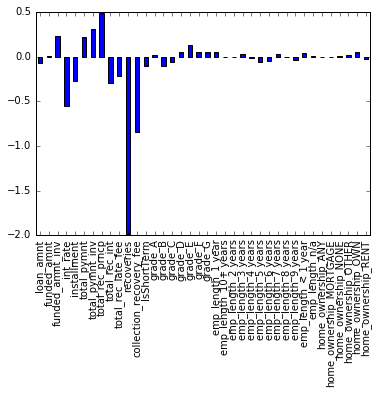

Pipeline ran in: 1.326 seconds


In [25]:
t1 = time.clock()

from sklearn.pipeline import Pipeline

std_scl = StandardScaler()
lr_clf = LogisticRegression(penalty='l2', C=0.05) 

# create the pipline
piped_object = Pipeline([('scale', std_scl), ('logit_model', lr_clf)])

# run the pipline corssvalidated
for iter_num, (train_indices, test_indices) in enumerate(cv_object):
    piped_object.fit(X[train_indices],y[train_indices])
    
# it is a little odd getting trained objects from a pipeline:
trained_model_from_pipeline = piped_object.named_steps['logit_model']

# now look at the weights
weights = pd.Series(trained_model_from_pipeline.coef_[0],index=df_all.columns)
weights.plot(kind='bar')
plt.show()

t2 = time.clock()
print('Pipeline ran in: %.3f seconds' % (t2-t1))

[[ -5.33823149e-03  -2.65182545e-01   2.73122814e-01  -1.66913690e-04
   -1.80552759e-03   5.99560026e-03  -2.50850062e-01   2.09492092e-01
    6.29964779e-02  -1.18417283e-03  -3.84184246e+00  -5.91295242e-01
    1.02669431e-04  -2.87761475e-05  -8.09986396e-05  -5.88890913e-05
    2.88359092e-05   1.37404652e-04   1.28718761e-04   1.04030525e-04
   -2.94309091e-05   6.64544041e-05  -3.89616655e-05  -7.75447727e-06
    2.83573454e-05   3.84237582e-05   9.66182957e-06  -4.64411884e-05
   -4.50270880e-05  -2.13172567e-05   4.06957389e-06  -2.91083823e-05
    0.00000000e+00   3.18325716e-05   0.00000000e+00   3.12527781e-14
   -2.36852361e-05  -1.79872459e-05]]


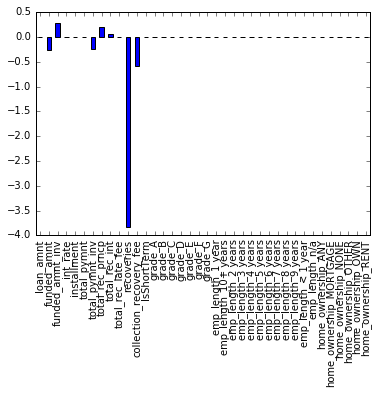

In [26]:
print svm_clf.coef_
weights = pd.Series(svm_clf.coef_[0],index=df_all.columns)
weights.plot(kind='bar')

### Interpretation

From the standardized coefficients, we see that the two most influential features are "recoveries" and "collection_recovery_fee". These two features are related and have a high influence on whether a existing loan is in good status. If the borrower has a "collection_recovery_fee" amount, it means that the borrower previously defaulted on a loan. Since they had defaulted on a loan, a debt collector or a third-party had to attempt to recover the amount owed on Lending Club's behalf. The amount that was able to be recovered is the "recoveries" feature and the cost that it took to recover that amount is the "collection_recovery_fee" feature.

We know from the simple statistics below, we see the majority (over 860k) of the values in "recoveries" and "collection_recovery_fee" are zero. We also know from the response variable that the majority of the loans (811k) are in good standing. Thus the depiction of the "recoveries" and "collection_recovery_fee" weight on the visualization above are consistent with expectations.

It is somewhat expected as this data set is from Lending Club and they have vetted the reliable borrowers.

In [27]:
df_all.recoveries.value_counts()

0.00       862702
200.00         10
14.28           9
11.70           9
10.00           9
16.50           8
100.00          8
16.80           8
800.00          8
10.40           8
10.20           7
11.20           7
12.00           7
1200.00         7
10.08           7
12.24           6
3000.00         6
19.20           6
11.16           6
5200.00         6
5000.00         6
10.35           6
10.92           6
10.66           6
13.50           6
13.44           6
2500.00         6
13.20           6
10.56           6
2000.00         5
            ...  
2515.66         1
779.52          1
3466.54         1
1586.42         1
3559.35         1
393.51          1
2300.52         1
154.28          1
4585.41         1
962.51          1
1932.08         1
172.22          1
2511.40         1
552.71          1
666.02          1
1362.12         1
2673.48         1
417.12          1
643.27          1
2550.07         1
623.93          1
665.75          1
4213.75         1
179.09          1
1578.51   

In [28]:
df_all.collection_recovery_fee.value_counts()

0.0000       863872
2.0000           18
1.8000           13
1.2000           12
1.5500           12
1.8800           12
0.8000           11
1.0700           11
2.5200           11
1.9000           11
3.2000           11
1.6000           11
3.3900           11
4.5200           11
1.6200           10
3.0900           10
1.4400           10
3.9300           10
2.6100           10
2.8800           10
1.6900           10
2.7300           10
2.0200           10
0.9300           10
4.6700            9
4.4100            9
0.8100            9
1.2100            9
1.8400            9
3.7100            9
              ...  
14.8169           1
123.1776          1
138.8844          1
149.1318          1
4.1765            1
11.9421           1
12.9631           1
570.5730          1
45.6066           1
316.3113          1
281.7612          1
6.0408            1
6.7914            1
538.9884          1
17.8144           1
214.3368          1
1139.6300         1
17.5300           1
17.0650           1


### Data Insight Based on Chosen Support Vectors

In [29]:
# look at the support vectors
print svm_clf.support_vectors_.shape
print svm_clf.support_.shape
print svm_clf.n_support_

(1520, 38)
(1520,)
[538 982]


In [30]:
df_tested_on = df_all.iloc[train_indices]
df_support = df_tested_on.iloc[svm_clf.support_,:]
df_support['IsLoanStatusGood'] = y[svm_clf.support_]
df_all['IsLoanStatusGood'] = y
df_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1520 entries, 264083 to 295776
Data columns (total 39 columns):
loan_amnt                  1520 non-null float64
funded_amnt                1520 non-null float64
funded_amnt_inv            1520 non-null float64
int_rate                   1520 non-null float64
installment                1520 non-null float64
total_pymnt                1520 non-null float64
total_pymnt_inv            1520 non-null float64
total_rec_prncp            1520 non-null float64
total_rec_int              1520 non-null float64
total_rec_late_fee         1520 non-null float64
recoveries                 1520 non-null float64
collection_recovery_fee    1520 non-null float64
IsShortTerm                1520 non-null int64
grade_A                    1520 non-null float64
grade_B                    1520 non-null float64
grade_C                    1520 non-null float64
grade_D                    1520 non-null float64
grade_E                    1520 non-null float64
grade_

/Users/james/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [31]:
# We have to replace the zero values with a positive number in order for the plot not to error out
df_all.recoveries = df_all.recoveries.replace(0.00, 0.01)
df_all.collection_recovery_fee = df_all.collection_recovery_fee.replace(0.00, 0.01)

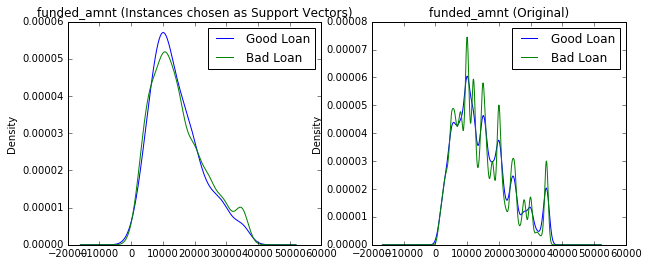

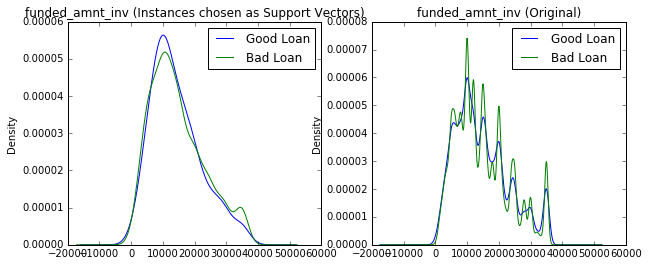

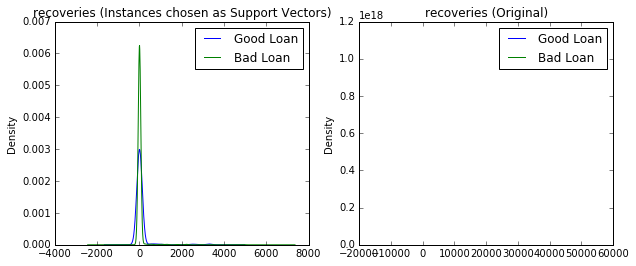

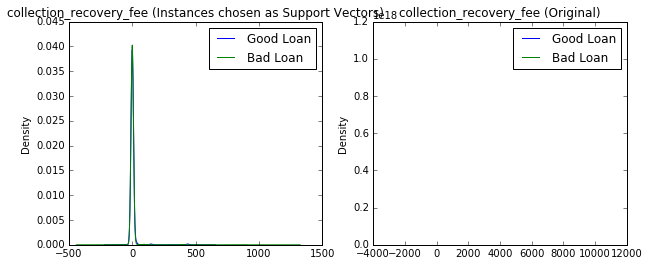

In [32]:
# now lets see the statistics of these attributes
from pandas.tools.plotting import boxplot

# group the original data and the support vectors
df_grouped_support = df_support.groupby(['IsLoanStatusGood'])
df_grouped = df_all.groupby(['IsLoanStatusGood'])

# plot KDE of Different variables
vars_to_plot = ['funded_amnt','funded_amnt_inv','recoveries', 'collection_recovery_fee']

for v in vars_to_plot:
    plt.figure(figsize=(10,4))
    # plot support vector stats
    plt.subplot(1,2,1)
    ax = df_grouped_support[v].plot.kde() 
    plt.legend(['Good Loan','Bad Loan'])
    plt.title(v+' (Instances chosen as Support Vectors)')
    
    # plot original distributions
    plt.subplot(1,2,2)
    ax = df_grouped[v].plot.kde() 
    plt.legend(['Good Loan','Bad Loan'])
    plt.title(v+' (Original)')

This analysis shows a side-by-side plot of the statistics of the support vectors compared to the original data. We note for recoveries and collection_recovery_fee, the majority of the values are zero, so the plot looks like it's empty.